# Linear State Space Models

Recall the following formulation:

$$
\begin{align}
x_{t+1} & = Ax_t + Cw_{t+1}, \\
y_t & = Gx_t, \tag{1}\\
x_0 &\sim N(\mu_0,\Sigma_0),
\end{align}
$$

for $t=0,1,2,\dots$ and $\{w_{t}\}$ is IID with $w_{t+1} \sim N(0,I)$. 

Given $A$, $C$, $G$, and draws of $x_0$ and $\{w_{t}\}$, model (1) pins down the values of sequences $\{x_t\}$ and $\{y_t\}$.




Let's consider our previous example from L26.2.2.2 (univariate autoregressive processes). Specifically, let $\{y_t\}_{t=0}^{100}$ satisfies:

$$
y_{t+1} = \phi_1y_t + \phi_2y_{t-1} + \phi_3y_{t-2} + \phi_4y_{t-3} + \sigma w_{t+1} \tag{2}
$$

where $\{w_{t}\}$ is IID and standard normal. 

When we map the above equations into our state space system (1), we set:

$$
x_t =
\begin{bmatrix}
y_t \\ y_{t-1} \\ y_{t-2} \\ y_{t-3}
\end{bmatrix}
\qquad
A = 
\begin{bmatrix}
\phi_1 & \phi_2 & \phi_3 & \phi_4 \\ 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0
\end{bmatrix}
\qquad
C = 
\begin{bmatrix}
\sigma \\ 0 \\ 0 \\ 0
\end{bmatrix}
\qquad
G = 
\begin{bmatrix}
1 & 0 & 0 & 0
\end{bmatrix}.
$$

Let us set $\phi_1 = 0.5$, $\phi_2 = -0.2$, $\phi_3 = 0$, $\phi_4 = 0.5$, $\sigma = 0.2$, $y_0 = y_{-1} = y_{-2} = y_{-3} = 1$. 

Now, simulate the dynamics of (2) using LinearStateSpace.

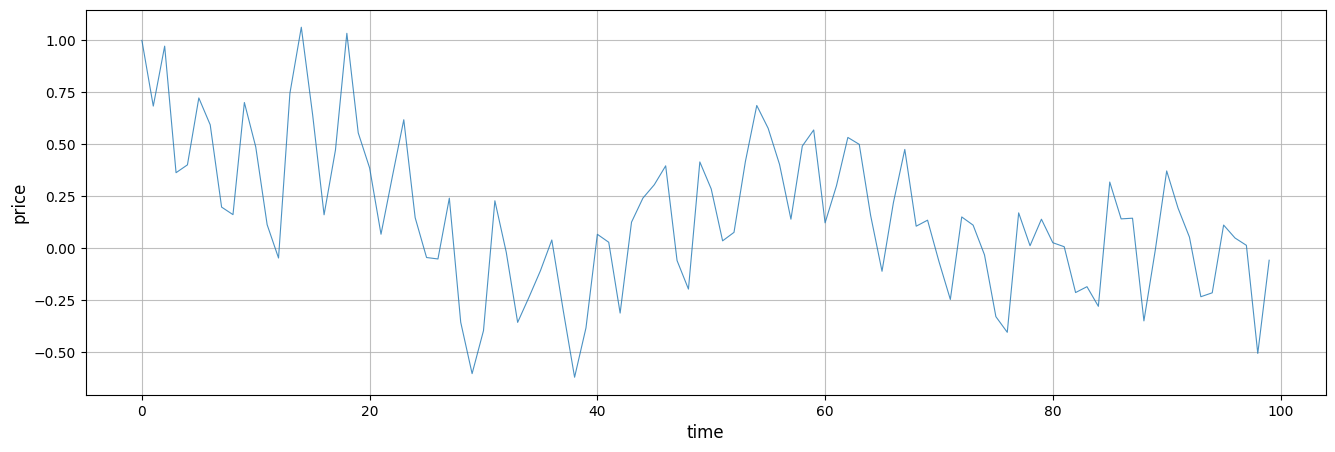

In [1]:
#Using LinearStateSpace to simulate the dynamics of a given AR process- Its 1 simulation of ts_length only
from quantecon import LinearStateSpace
import numpy as np
import matplotlib.pyplot as plt
phi1,phi2,phi3,phi4,sigma=0.5,-0.2,0,0.5,0.2
C=[[sigma],[0],[0],[0]]
G=[[1,0,0,0]]
A=[[phi1,phi2,phi3,phi4],
   [1,0,0,0],
   [0,1,0,0],
   [0,0,1,0]]
ts_length=100
n=4
def plot_lss(A,C,G,n,ts_length):
    ar=LinearStateSpace(A,C,G,mu_0=np.ones(n))
    x_t,y_t=ar.simulate(ts_length,random_state=123)
    
    fig,ax=plt.subplots(1,1,figsize=(16,5))
    y_t=y_t.flatten()
    ax.grid(alpha=0.8)
    ax.plot(y_t,label='$y_t$',lw=0.8,alpha=0.8)
    ax.set_xlabel('time',fontsize=12)
    ax.set_ylabel('price',fontsize=12)
    #plt.show()
plot_lss(A,C,G,n,ts_length)

array([[ 1.        ,  0.97159639,  0.6852207 , ...,  0.31473279,
         0.40228821,  0.38053538],
       [ 1.        ,  0.71266664,  0.78105592, ...,  0.08645089,
        -0.20368327,  0.31314471],
       [ 1.        ,  0.66060366,  0.53280189, ...,  0.11951296,
         0.17654504,  0.19815819],
       ...,
       [ 1.        ,  0.47723296,  0.48051654, ..., -0.1118105 ,
         0.14303015,  0.34294677],
       [ 1.        ,  0.90247239,  0.68790652, ..., -0.03294544,
        -0.03233757, -0.04108951],
       [ 1.        ,  0.95869396,  0.72427469, ..., -0.15362457,
         0.16208655,  0.41750546]])

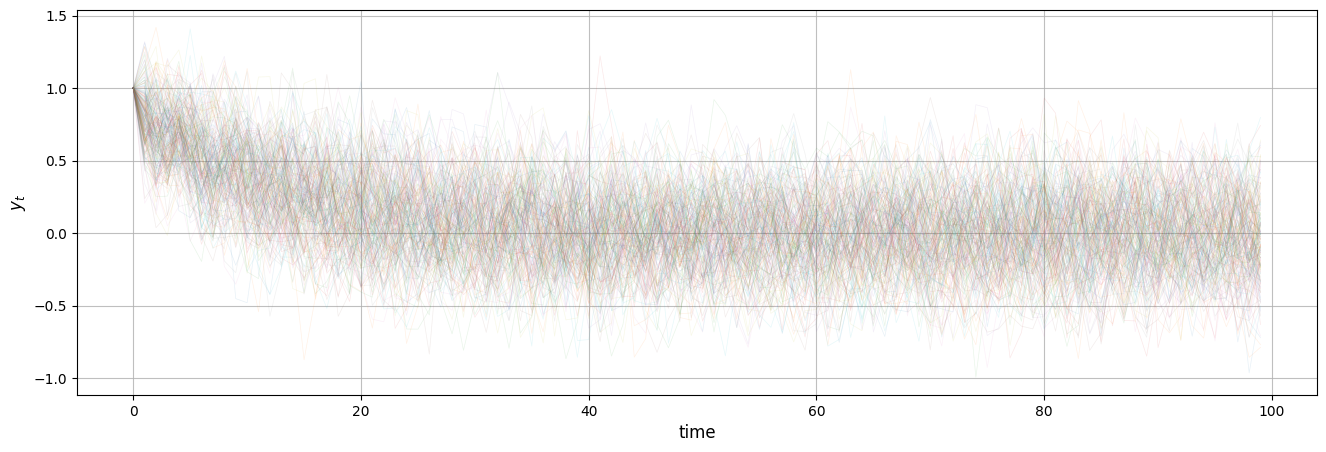

In [3]:
#Using LinearStateSpace to simulate an AR Process- 'N' Simualtions, N is denoted by 'sample size in the code'
def cross_section_plot(A,C,G,n,ts_length,sample_size):
    ar=LinearStateSpace(A,C,G,mu_0=np.ones(n))
    fig,ax=plt.subplots(1,1,figsize=(16,5))
    ax.grid(alpha=0.8)
    ax.set_xlabel('time',fontsize=12)
    ax.set_ylabel('$y_t$',fontsize=12)
    
    sample_y=np.zeros((sample_size,ts_length))
    for i in range(sample_size):
        x,y_0=ar.simulate(ts_length,random_state=None)
        y_0=y_0.flatten()
        ax.plot(y_0,label='y_t',lw=0.5,alpha=0.1)
        sample_y[i,:]=y_0
    return sample_y
sample_size=200
cross_section_plot(A,C,G,n,ts_length,sample_size)


#### $\textbf{Persistent Risk}$

We'll formulate a state-state space system in the usual form:


$$
\begin{aligned}
    x_{t+1} & =  A x_t + C w_{t+1},   \\
    y_t &  =  \underbrace{G}_{1\times n} \cdot \underbrace{x_t}_{n\times 1} \nonumber,
\end{aligned} 
$$

where:

$$
\begin{aligned}
    x_0 & \sim N(\mu_0, \Sigma_0), \\
    w_{t+1} & \sim N(0,I),
\end{aligned}
$$

and set some special parameters pinning down $A, C, G, \mu_0, \Sigma_0$.

<a id='index-0'></a>   

**Example I:** (Persistent risk)
  
Set $n=1$ and $A =1, C=0, G =1, \sigma > 0$.
  
Set $\mu_0 = 0, \Sigma_0 = \sigma^2 > 0 $. 
  
   * please compute and plot the unconditional moments $\mu_t$ and $\Sigma_t$ of $x_t$ for $ t=0, 1, \ldots, 100$. 
     
   * please compute and plot the unconditional moments of $y_t$ for $ t=0, 1, \ldots, 100$. 
     
   * please simulate $N$ paths of $\{y_t\}_{t=0}^{100}$.
     
   * please take the **ensemble** formed by those $N$ paths, compute and plot **cross-section** means and variances of $y_t$ across paths.
     
   * please select **one** and only one path $\{y_t\}_{t=0}^{100}$ from the ensemble of $N$ paths and for that **one** path compute its  sample mean and variance using the formulas $ \bar y = 101^{-1} \sum_{t=0}^{100} y_t$ and $ \hat \sigma^2 = 100^{-1} \sum_{t=0}^{100} ( y_t - \bar y)^2$. (Please note that you can compute these easily using **numpy.mean** and **numpy.var**)
        
   * please compare the sample mean and variance that you computed with the associated values of the population moments that you computed earlier.  Discuss.
     


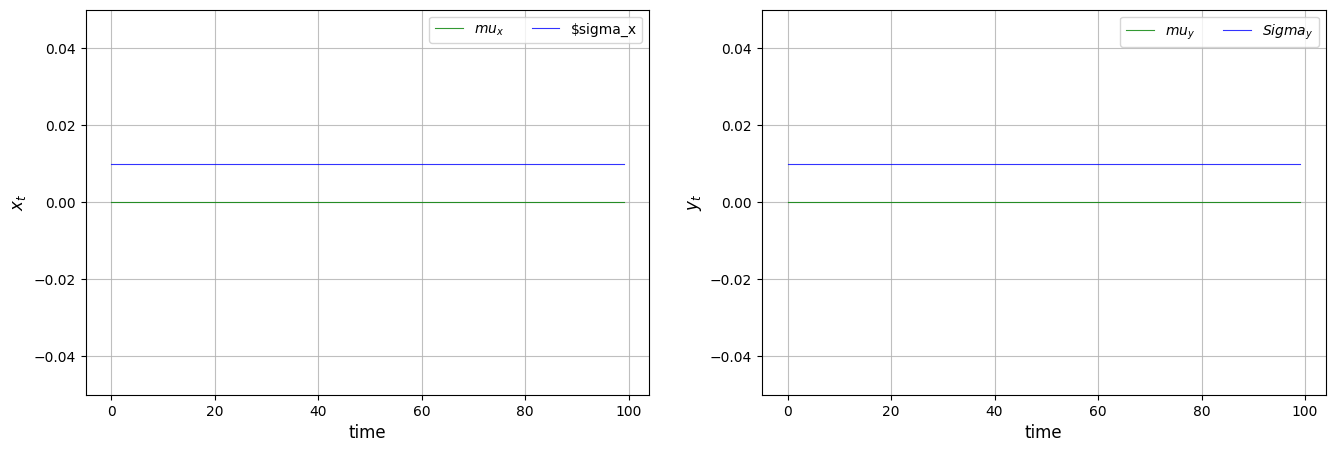

In [22]:
#Unconditional Moments for x_t and y_t
n=1
A=1
C=0
G=1
mu_0=0
sigma=0.1
ts_length=100
ar=LinearStateSpace(A,C,G,mu_0=0,Sigma_0=sigma**2)
mm0=ar.moment_sequence()
mu_x=[]
mu_y=[]
Sigma_x=[]
Sigma_y=[]

for t in range(ts_length):
    m_x,m_y,s_x,s_y=next(mm0)
    mu_x.append(float(m_x))
    mu_y.append(float(m_y))
    Sigma_x.append(float(s_x))
    Sigma_y.append(float(s_y))
fig,ax=plt.subplots(1,2,figsize=(16,5))
ax[0].grid(alpha=0.8)
ax[0].plot(mu_x,label='$mu_x$',color='g',lw=0.8,alpha=0.8)
ax[0].plot(Sigma_x,label='$sigma_x',color='b',lw=0.8,alpha=0.8)
ax[0].set_xlabel('time',fontsize=12)
ax[0].set_ylabel('$x_t$',fontsize=12)
ax[0].set_ylim(-0.05,0.05)
ax[0].legend(ncol=2)

ax[1].grid(alpha=0.8)
ax[1].plot(mu_y,color='g',label='$mu_y$',lw=0.8,alpha=0.8)
ax[1].plot(Sigma_y,color='b',label='$Sigma_y$',lw=0.8,alpha=0.8)
ax[1].set_xlabel('time',fontsize=12)
ax[1].set_ylabel('$y_t$',fontsize=12)
ax[1].set_ylim(-0.05,0.05)
ax[1].legend(ncol=2)

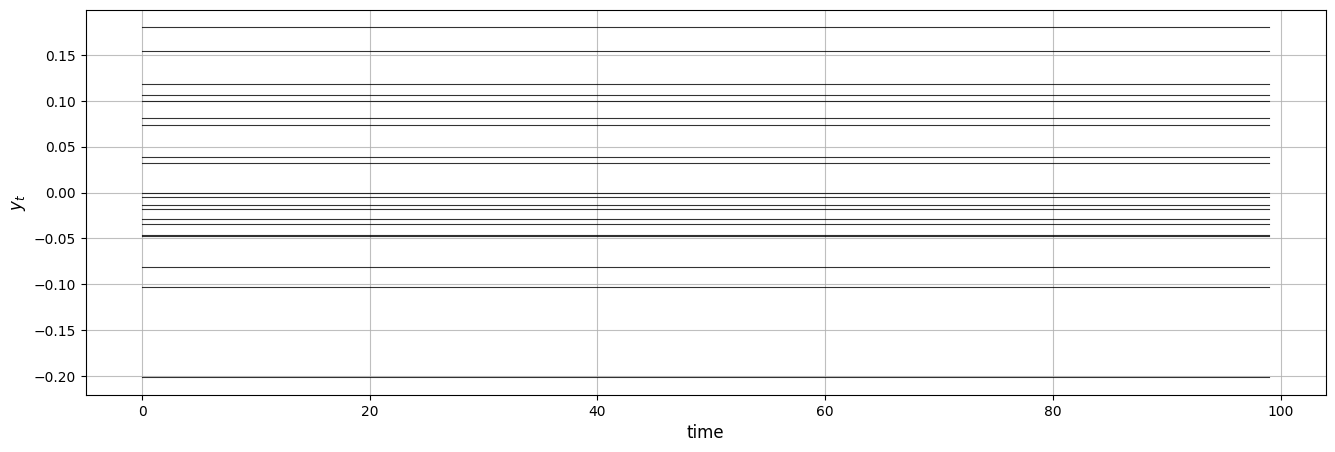

In [39]:
#Simulation of N paths of y_t
sample_size=20
sample_y=np.zeros((sample_size,ts_length))
fig,ax=plt.subplots(1,1,figsize=(16,5))
ax.grid(alpha=0.8)
ax.set_xlabel('time',fontsize=12)
ax.set_ylabel('$y_t$',fontsize=12)

for i in range(sample_size):
    x,y0=ar.simulate(ts_length,random_state=None)
    y0=y0.flatten()
    ax.plot(y0,label='$y_t$',lw=0.8,alpha=0.8,color='k')
    sample_y[i,:]=y0


[]

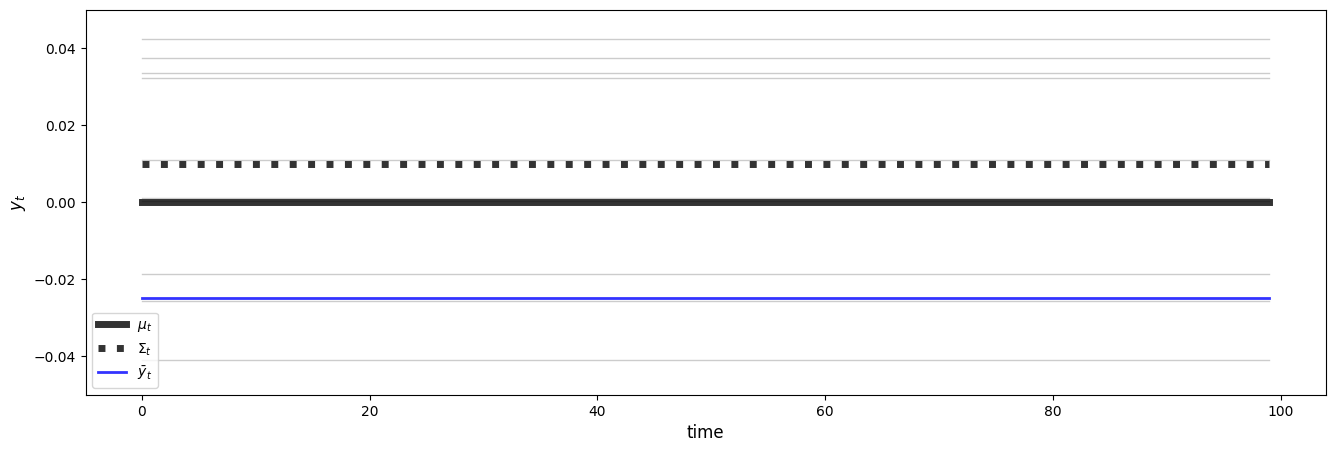

In [40]:
#ensemble_mean computation
fig1, ax1 = plt.subplots(1,1,figsize=(16,5))

sample_y = np.zeros((sample_size,ts_length)) 
ensemb_m = np.zeros(ts_length)

for i in range(sample_size):    
    x0, y0 = ar.simulate(ts_length)
    y0     = y0.flatten()
    ax1.plot(y0, color='k', lw=1, alpha=0.2)
    sample_y[i,:] = y0
    ensemb_m = ensemb_m + y0
        
ensemb_m = ensemb_m/sample_size
    
ax1.plot(mu_y, color='k', lw=5, alpha=0.8, label='$\mu_t$')
ax1.plot(Sigma_y, linestyle='dotted',color='k', lw=5, alpha=0.8, label='$\Sigma_t$')
ax1.plot(ensemb_m, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')
ax1.set_ylim(-0.05, 0.05)
ax1.set_ylabel('$y_t$',fontsize=12)    
ax1.set_xlabel('time',fontsize=12)    
ax1.legend(ncol=1)
plt.plot()

# print(np.mean(sample_y[1,:]))
# print(np.var(sample_y[1,:]))

**Example II:** (IID risk)

Set $n=1$ and $A =0, C=\sigma, G =1 , \mu_0 = 1, \Sigma_0  = C C'$. 
  
  * please compute and plot the unconditional moments $\mu_t$ and $\Sigma_t$ of $x_t$ for $ t=0, 1, \ldots, 100$. 
     
  * please compute and plot the unconditional moments of $y_t$ for $ t=0, 1, \ldots, 100$. 
     
  * please simulate $N$ paths of $\{y_t\}_{t=0}^{100}$.
     
   * please take the **ensemble** formed by those $N$ paths, compute and plot **cross-section** means and variances of $y_t$ across paths.
     
   * please select **one** and only one path $\{y_t\}_{t=0}^{100}$ from the ensemble of $N$ paths and for that **one** path compute its  sample mean and variance using the formulas
     $ \bar y = 101^{-1} \sum_{t=0}^{100} y_t$ and $\hat{\sigma}^2 = 100^{-1} \sum_{t=0}^{100}(y_t-\bar y)^2$. (Please note that you can compute these easily using **numpy.mean** and **numpy.var**)
    
   * please compare the sample mean and variance that you computed with the associated values of the population moments that you computed earlier. Discuss.


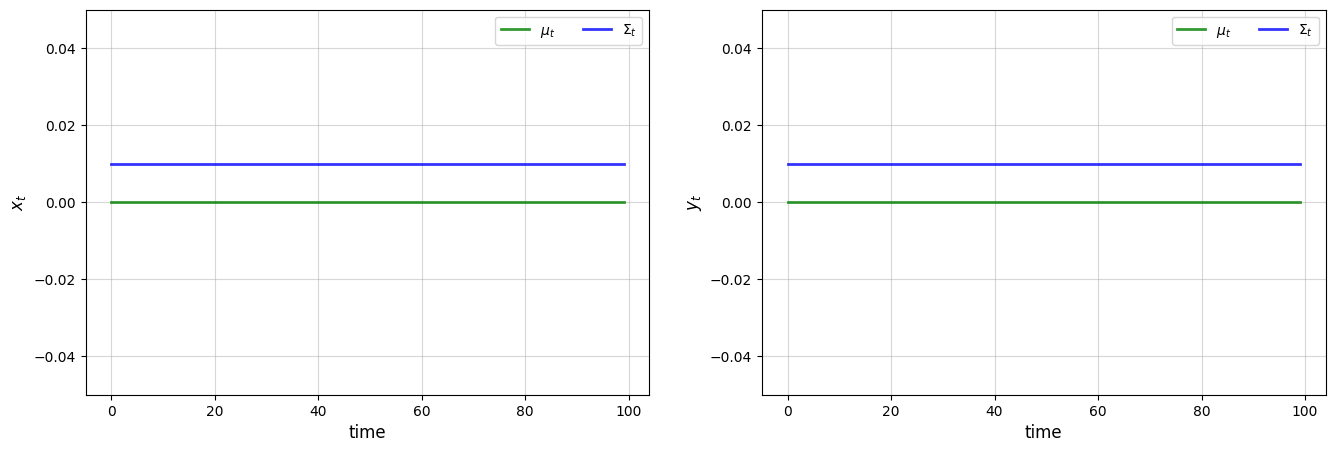

In [99]:
sigma0 = 0.1
A1     = 0
C1     = sigma0
G1     = 1
T1     = 100
N1     = 20
Sigma0 = C1*C1

ar1    = LinearStateSpace(A=A1, C=C1, G=G1, mu_0=0, Sigma_0=Sigma0)

fig2,ax2 = plt.subplots(1,2,figsize=(16,5))

mm1      = ar1.moment_sequence()
mu_x1    = []
mu_y1    = []
Sigma_x1 = []
Sigma_y1 = []
for t in range(T1):
    m_x1, m_y1, S_x1, S_y1 = next(mm1)
    mu_x1.append(float(m_x1))
    mu_y1.append(float(m_y1))
    Sigma_x1.append(float(S_x1))
    Sigma_y1.append(float(S_y1))
    
ax2[0].plot(mu_x1, color='g', lw=2, alpha=0.8, label='$\mu_t$')
ax2[0].plot(Sigma_x1, color='b', lw=2, alpha=0.8, label='$\Sigma_t$')
ax2[0].set_ylim(-0.05, 0.05)
ax2[0].set_xlabel('time', fontsize=12)
ax2[0].set_ylabel('$x_t$', fontsize=12)
ax2[0].legend(ncol=2)
ax2[0].grid(alpha = 0.5)
ax2[1].plot(mu_y1, color='g', lw=2, alpha=0.8, label='$\mu_t$')
ax2[1].plot(Sigma_y1, color='b', lw=2, alpha=0.8, label='$\Sigma_t$')
ax2[1].set_ylim(-0.05, 0.05)
ax2[1].set_xlabel('time', fontsize=12)
ax2[1].set_ylabel('$y_t$', fontsize=12)
ax2[1].legend(ncol=2)
ax2[1].grid(alpha = 0.5)
plt.show()    

[]

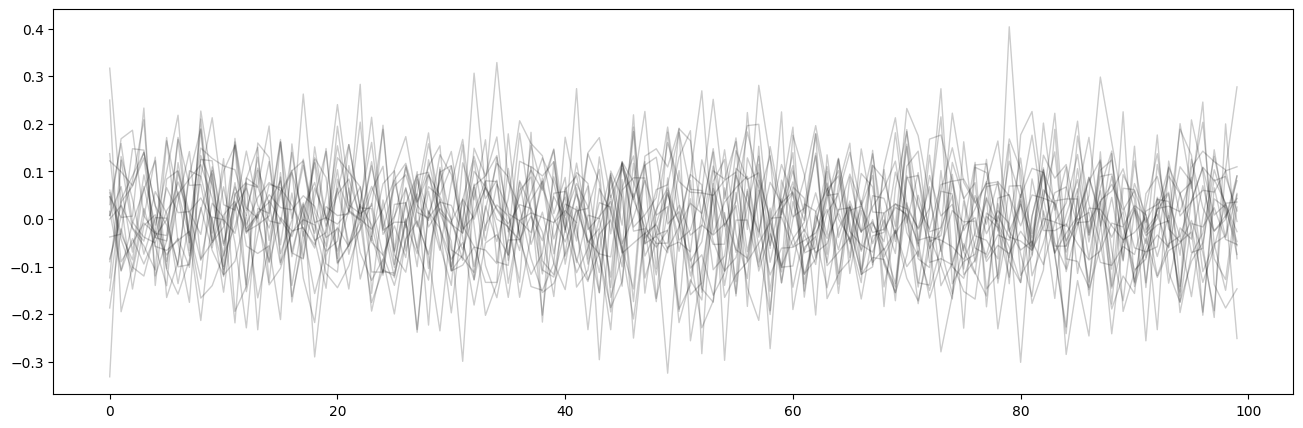

In [42]:
fig3, ax3 = plt.subplots(1,1,figsize=(16,5))

sample_y1 = np.zeros((N1,T1)) 
ensemb_m1 = np.zeros(T1)

for i in range(N1):    
    x1, y1 = ar1.simulate(ts_length=T1)
    y1     = y1.flatten()
    ax3.plot(y1, color='k', lw=1, alpha=0.2)
    sample_y1[i,:] = y1
    ensemb_m1      = ensemb_m1 + y1
        
ensemb_m1 = ensemb_m1/N1
    
ax1.plot(mu_y1, color='k', lw=5, alpha=0.8, label='$\mu_t$')
ax1.plot(Sigma_y1, linestyle='dotted',color='k', lw=5, alpha=0.8, label='$\Sigma_t$')
ax1.plot(ensemb_m1, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')
ax1.set_ylim(-0.05, 0.05)
ax1.set_ylabel('$y_t$',fontsize=12)    
ax1.set_xlabel('time',fontsize=12)    
ax1.legend(ncol=1)
plt.plot()

# print(np.mean(sample_y1[1,:]))
# print(np.std(sample_y1[1,:]))


# MARKOV CHAINS

In [49]:
import quantecon as qe
P=[[0.4,0.6],[0.8,0.2]]
mc=qe.MarkovChain(P)
b=mc.stationary_distributions
#stochastic matrix-> every element should be non negative and row sum should be equal to 1; hence yes

In [50]:
b@P #yes it is stationary

array([[0.57142857, 0.42857143]])

In [51]:
#2nd ques
P=[[0.68,0.12,0.20],
   [0.50,0.24,0.26],
   [0.36,0.18,0.46]]
mc1=qe.MarkovChain(P)


In [54]:
zhi0=[[0.73,0.26,0.01]]
zhi0@np.linalg.matrix_power(P,100)

array([[0.56145769, 0.15565164, 0.28289067]])

In [55]:
#initial marginal distribution isn't unique
mc1.stationary_distributions #basically koi bhi distribution jo at large power of P stationary distribution par converge ho jaaye

array([[0.56145769, 0.15565164, 0.28289067]])

In [56]:
zhi1=[[0.5,0,0.5]]
zhi1@np.linalg.matrix_power(P,1000)

array([[0.56145769, 0.15565164, 0.28289067]])

In [57]:
zhi1@np.linalg.matrix_power(P,10000000)

array([[0.56145769, 0.15565164, 0.28289067]])

In [ ]:
#the second chain will converge more quickly in this case

In [58]:
#Q_3
import numpy as np
zhi_new=np.zeros(12)
zhi_new[0]=1
S=np.zeros(12)
S[11]=1

In [60]:
zhi_new@S

0.0

In [65]:
transitionmatrix=np.zeros((12,12))
np.fill_diagonal(transitionmatrix[0:9,1:],1)
alpha=0.5
transitionmatrix[9,10]=1-alpha
transitionmatrix[9,11]=alpha
transitionmatrix[10,10]=1-alpha
transitionmatrix[10,11]=alpha
transitionmatrix[11,11]=1
print(transitionmatrix)

[[0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5 0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


In [67]:
#ensemble average
zhi_new@np.linalg.matrix_power(transitionmatrix,10)@S

0.5

# Plotting rate of convergence of a markov chain

In [82]:
def generate_initial_values(num_distributions):
    n = len(P)
    ψ_0s = np.empty((num_distributions, n))

    for i in range(num_distributions):
        draws = np.random.randint(1, 10_000_000, size=n)

        # Scale them so that they add up into 1
        ψ_0s[i,:] = np.array(draws/sum(draws))

    return ψ_0s

def iterate_ψ(ψ_0, P, ts_length):
    n = len(P)
    ψ_t = np.empty((ts_length, n))
    ψ = ψ_0
    for t in range(ts_length):
        ψ_t[t] = ψ
        ψ = ψ @ P
    return np.array(ψ_t)

def plot_distribution(P, ts_length, num_distributions):

    # Get parameters of transition matrix
    n = len(P)
    mc = qe.MarkovChain(P)
    ψ_star = mc.stationary_distributions[0]

    ## Draw the plot
    fig, axes = plt.subplots(nrows=1, ncols=n, figsize=[11, 5])
    plt.subplots_adjust(wspace=0.35)

    ψ_0s = generate_initial_values(num_distributions)

    # Get the path for each starting value
    for ψ_0 in ψ_0s:
        ψ_t = iterate_ψ(ψ_0, P, ts_length)

        # Obtain and plot distributions at each state
        for i in range(n):
            axes[i].plot(range(0, ts_length), ψ_t[:,i], alpha=0.3)

    # Add labels
    for i in range(n):
        axes[i].axhline(ψ_star[i], linestyle='dashed', lw=2, color = 'black',
                        label = fr'$\psi^*({i})$')
        axes[i].set_xlabel('t')
        axes[i].set_ylabel(fr'$\psi_t({i})$')
        axes[i].legend()

    plt.show()

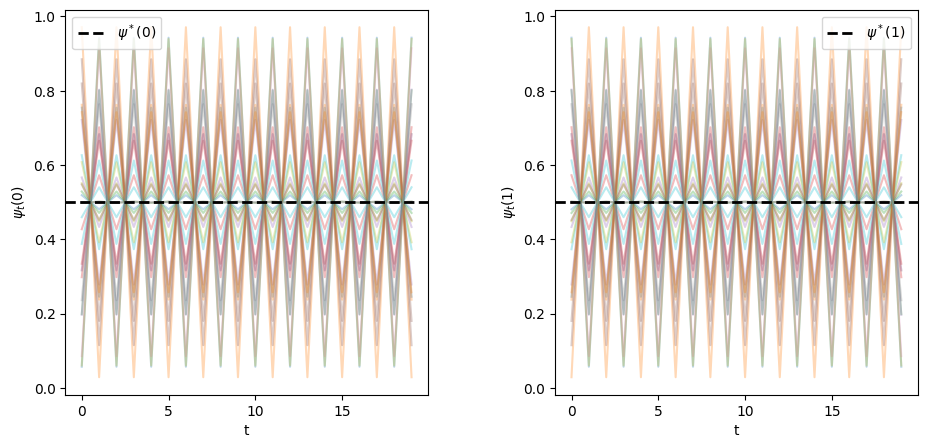

In [90]:
#Plotting the rate of convergence
P=np.array([[0,1],[1,0]])
mc=quantecon.MarkovChain(P)
ts_length=20
num_distributions=30
plot_distribution(P, ts_length, num_distributions)

In [93]:
P=[[0.68,0.12,0.20],
   [0.50,0.24,0.26],
   [0.36,0.18,0.46]]
mc1=qe.MarkovChain(P)

In [94]:
#Eigenvectors and Eigenvalue method
P_eigenvals = np.linalg.eigvals(P)
P_eigenvals

array([1.        , 0.28219544, 0.09780456])

In [95]:
P_10=np.linalg.matrix_power(P,10)
P10_eigenvals = np.linalg.eigvals(P_10)
P10_eigenvals

array([1.0000000e+00, 3.2025800e-06, 8.0092382e-11])

In [96]:
1.0000000e+00-8.0092382e-11 #since this difference is larger; this one will converge faster

0.9999999999199076

In [97]:
1-0.09780456# this will converge slower

0.90219544